## `firstframe` step

This MIRI only step flags the first group in every integration as bad if the number of groups is greater than 3. No correction or flagging is done otherwise.

Official documentation for `firstframe` can be found here:

<https://jwst-pipeline.readthedocs.io/en/latest/jwst/firstframe/index.html>


### Input data

An example of running the `firstframe` step is now shown using a simple simulated observation of a galaxy with the MIRI Imager (F1130W filter) produced with [MIRISim v2.3](https://wiki.miricle.org/Public/MIRISim_Public), with precending pipeline steps applied, i.e. `saturation` output.

### Python

Start by importing what will be used and set the `CRDS_CONTEXT`

In [1]:
# imports
import os, glob, shutil
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from jwst import datamodels

# set the CRDS_CONTEXT
os.environ["CRDS_CONTEXT"] = "jwst_0641.pmap"

Import `firstframe` and print the docstring and spec to show some information

In [2]:
#import the step
from jwst.firstframe import firstframe_step

# print the description and options
print(firstframe_step.FirstFrameStep.__doc__)
print(firstframe_step.FirstFrameStep.spec)


    FirstFrameStep: This is a MIRI specific task.  If the number of groups
    is greater than 3, the DO_NOT_USE group data quality flag is added to
    first group.
    

    pre_hooks          = string_list(default=list())
    post_hooks         = string_list(default=list())
    output_file        = output_file(default=None)   # File to save output to.
    output_dir         = string(default=None)        # Directory path for output files
    output_ext         = string(default='.fits')     # Default type of output
    output_use_model   = boolean(default=False)      # When saving use `DataModel.meta.filename`
    output_use_index   = boolean(default=True)       # Append index.
    save_results       = boolean(default=False)      # Force save results
    skip               = boolean(default=False)      # Skip this step
    suffix             = string(default=None)        # Default suffix for output files
    search_output_file = boolean(default=True)       # Use outputfile define in 

Set the name of the input file and run the step. This will produce an output file ending with `_firstframestep.fits`

*Parameters used:*

`output_use_model` : boolean, optional, default=False  
&nbsp;&nbsp;&nbsp;&nbsp; propagate the input filename to the output
    
`save_results`: boolean, optional, default=False  
&nbsp;&nbsp;&nbsp;&nbsp; save the results to file

Note that the `firstframe` will return the output datamodel so we set this to the `dm` variable.


In [3]:
# user specified
my_input_file = 'det_image_seq1_MIRIMAGE_F1130Wexp1_saturationstep.fits'

# run the step
dm = firstframe_step.FirstFrameStep.call(my_input_file, output_use_model=True, save_results=True)


2020-10-29 14:04:52,812 - CRDS - ERROR -  Error determining best reference for 'pars-firstframestep'  =   Unknown reference type 'pars-firstframestep'
2020-10-29 14:04:52,814 - stpipe.FirstFrameStep - INFO - FirstFrameStep instance created.
2020-10-29 14:04:52,891 - stpipe.FirstFrameStep - INFO - Step FirstFrameStep running with args ('det_image_seq1_MIRIMAGE_F1130Wexp1_saturationstep.fits',).
2020-10-29 14:04:52,892 - stpipe.FirstFrameStep - INFO - Step FirstFrameStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2020-10-29 14:04:54,956 - stpipe.FirstFrameStep - INFO - Saved model in det_image_seq1_MIRIMAGE_F1130Wexp1_firstframestep.fits
2020-10-29 14:04:54,956 - stpipe.FirstFrameStep - INFO - Step FirstFrameStep done


We can plot the GROUPDQ first frame image and the GROUPDQ 1D array for a sample pixel to check the step has flagged the first frame in the ramps with a value of 1

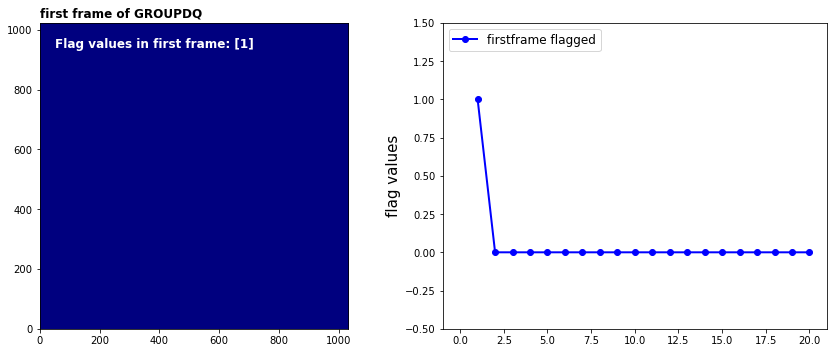

In [4]:
# set the sample pixel
pixel = [688,511]

# define group numbers for integration ramps
group = range(1,dm.data[0,:,pixel[0],pixel[1]].shape[0]+1,1)

# plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot the first frame of the first integration of the GROUPDQ extension
axs[0].imshow(dm.groupdq[0][0], cmap='jet', interpolation='nearest', origin='lower')
axs[0].annotate('first frame of GROUPDQ', xy=(0.0, 1.02), xycoords='axes fraction', 
                fontsize=12, fontweight='bold', color='k')

# determine the values in this GROUPDQ frame
flag_values = np.unique(dm.groupdq[0][0])
axs[0].annotate('Flag values in first frame: %s' % flag_values, xy=(0.05, 0.92), 
                xycoords='axes fraction', fontsize=12, fontweight='bold', color='w')

# input and output ramps (setting a slight offset for the output ramp)
axs[1].plot(group, dm.groupdq[-1,:,pixel[1],pixel[0]], c='b', marker='o', linestyle='-', 
            linewidth=2, label='firstframe flagged')

axs[1].set_ylabel('flag values',fontsize=15)
axs[1].set_xlim(-1,max(group)+1)
axs[1].set_ylim(-0.5,1.5)
axs[1].legend(prop={'size':12}, loc=2)

plt.tight_layout(h_pad=0)
plt.show()

### Command line

To achieve the same result from the command line there are a couple of options. 

**Option 1:**
Run the `FirstFrameStep` class using the `strun` command:

```bash
strun jwst.firstframe.FirstFrameStep det_image_seq1_MIRIMAGE_F1130Wexp1_saturationstep.fits
```

**Option 2:**
If they don't already exist, collect the pipeline configuration files in your working directory using `collect_pipeline_configs` and then run the `FirstFrameStep` using the `strun` command with the associated `firstframe.cfg` file. 

```bash
collect_pipeline_cfgs cfgs/

strun cfgs/firstframe.cfg det_image_seq1_MIRIMAGE_F1130Wexp1_saturationstep.fits
```

This will produce the same output file ending with `_firstframestep.fits` 


A full list of the command line options are given by running the following:

```bash
strun jwst.firstframe.FirstFrameStep -h
```

or 

```bash
strun cfgs/firstframe.cfg -h
```


### Override reference file

There is currently no reference file for the firstframe step.